Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [76]:
# %run -i "assignment_helper.py"
%matplotlib inline
from helper import *

# State preparation



As explained in Maria Schuld's guest lecture, to prepare a state in a particular encoding is done by rotating vectors, in other words to map vectors into others, which is the basic idea of kernel learning. This procedure gives rise to interesting kernels, without the need of specifying the mapping function.


Let us work with an easy training data set of two vectors, $S = \{(\begin{bmatrix}0 \\ 1\end{bmatrix}, 0), (\begin{bmatrix}\frac{1}{2}\sqrt{2} \\ \frac{1}{2}\sqrt{2}\end{bmatrix}, 1)\}$. Let's have a test instance $\begin{bmatrix}1 \\ 0\end{bmatrix}$. We will build the interference circuit for this.

**Exercise 1** (1 point).

Create a circuit in your preferred framework that works on four qubits: ancilla, index, data, and class. Put the ancilla and index qubits into a uniform superposition. Verify for yourself that this also encodes the test data in the coefficients of the $|0000\rangle$, $|0100\rangle$ states as well as in the $|0010\rangle$, $| 0110\rangle$ states.


Place your solution in an object called `circuit`. 

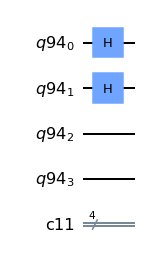

In [77]:
###
### YOUR CODE HERE

ancilla_qubit = 0
index_qubit = 1
data_qubit = 2
class_qubit = 3

q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)
circuit.h([ancilla_qubit,index_qubit])
# Verify for yourself that this preparation is also sufficient to represent the test vector
circuit.draw('mpl')
###

In [78]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([0.5 +0.j, 0.5+0.j, 0.5 +0.j, 0.5+0.j, 0.+0.j, 0. +0.j, 0.+0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]))
get_amplitudes(circuit).draw('latex')

<IPython.core.display.Latex object>

**Exercise 2** (1 point).

Extend the circuit to prepare the first training instance, by pushing the feature values into the coefficients of the $|0001\rangle$ and $|0101\rangle$, without affecting any of the other coefficients.

In [79]:
def get_angle(amplitude_0):
    return 2*np.arccos(amplitude_0)

In [80]:
###
### YOUR CODE HERE
circuit.cu(get_angle([0,1])[0],0,0,0,ancilla_qubit,data_qubit)
get_amplitudes(circuit).draw('latex')
###

<IPython.core.display.Latex object>

In [81]:
import qiskit.quantum_info as qi

In [82]:
# circuit.x(ancilla_qubit)
get_amplitudes(circuit).draw('latex')
# circuit.draw()

<IPython.core.display.Latex object>

In [83]:
circuit.ccx(ancilla_qubit,index_qubit,data_qubit)
# circuit.x(index_qubit)
get_amplitudes(circuit).draw('latex')

<IPython.core.display.Latex object>

In [84]:
circuit.draw()

┌───┐                   
q94_0: ┤ H ├──────■─────────■──
       ├───┤      │         │  
q94_1: ┤ H ├──────┼─────────■──
       └───┘┌─────┴──────┐┌─┴─┐
q94_2: ─────┤ U(π,0,0,0) ├┤ X ├
            └────────────┘└───┘
q94_3: ────────────────────────
                               
c11: 4/════════════════════════

In [85]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([0.5 +0.j, 0. +0.j, 0.5 +0.j, 0.5+0.j, 0.+0.j, 0.5+0.j, 0.+0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]))

In [86]:
qi.Statevector(np.array([0.5 +0.j, 0. +0.j, 0.5 +0.j, 0.5+0.j, 0.+0.j, 0.5+0.j, 0.+0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j])).draw('latex')

<IPython.core.display.Latex object>

**Exercise 3** (2 points).

As a final step in the preparation, extend the circuit to push the feature values of the second training instance into the coefficients of the $|0011\rangle$ and $|0111\rangle$ states.

Remember that, as explained in the lecture notebook, loading vectors with amplitude encoding requires to apply a double controlled rotation by an angle determined by the coordinates of the vector.


In [87]:
###
### YOUR CODE HERE
circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
circuit.ry(-get_angle(np.array([1,1])/np.sqrt(2))[1]/2, data_qubit)
circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
circuit.ry(get_angle(np.array([1,1])/np.sqrt(2))[1]/2, data_qubit)
circuit.barrier()

###

In [88]:
circuit.draw()

┌───┐                                                     ░ 
q94_0: ┤ H ├──────■─────────■────■────────────────■──────────────░─
       ├───┤      │         │    │                │              ░ 
q94_1: ┤ H ├──────┼─────────■────■────────────────■──────────────░─
       └───┘┌─────┴──────┐┌─┴─┐┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐ ░ 
q94_2: ─────┤ U(π,0,0,0) ├┤ X ├┤ X ├┤ Ry(-π/4) ├┤ X ├┤ Ry(π/4) ├─░─
            └────────────┘└───┘└───┘└──────────┘└───┘└─────────┘ ░ 
q94_3: ──────────────────────────────────────────────────────────░─
                                                                 ░ 
c11: 4/════════════════════════════════════════════════════════════

In [89]:
get_amplitudes(circuit).draw('latex')

<IPython.core.display.Latex object>

In [90]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([0.5 +0.j,  0. +0.j,  0.5 +0.j,  np.sqrt(2)/4 + 0.j,  0.+0.j,  0.5+0.j,
       0.+0.j,  np.sqrt(2)/4 +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j]))

In [91]:
qi.Statevector(np.array([0.5 +0.j,  0. +0.j,  0.5 +0.j,  np.sqrt(2)/4 + 0.j,  0.+0.j,  0.5+0.j,
       0.+0.j,  np.sqrt(2)/4 +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j])).draw('latex')

<IPython.core.display.Latex object>

**Exercise 4** (1 point). 

Finish the state preparation circuit by a conditional flip of the class qubit, such that the coefficients of the second training vector and those of the copy of the test vector have the class bit equal to 1, without affecting any of the other coefficients.


It is very useful at this point, for testing purposes, to add code which shows the state vectors, as done in the lecture notebook


In [99]:
###
### YOUR CODE HERE
circuit.cx(index_qubit,class_qubit)
###


In [100]:
get_amplitudes(circuit).draw('latex')

<IPython.core.display.Latex object>

In [101]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([ 0.5 +0.j,  0.  +0.j,  0. +0.j,  0.+0.j, 0.  +0.j,  0.5 +0.j,  0. +0.j,  0.+0., 0.  +0.j,  0.  +0.j,  0.5+0.j,  np.sqrt(2)/4 +0j, 0.  +0.j,  0.  +0.j,  0. +0.j,  np.sqrt(2)/4 +0.j]))

In [102]:
qi.Statevector(np.array([ 0.5 +0.j,  0.  +0.j,  0. +0.j,  0.+0.j, 0.  +0.j,  0.5 +0.j,  0. +0.j,  0.+0., 0.  +0.j,  0.  +0.j,  0.5+0.j,  np.sqrt(2)/4 +0j, 0.  +0.j,  0.  +0.j,  0. +0.j,  np.sqrt(2)/4 +0.j])).draw('latex')

<IPython.core.display.Latex object>

# Interference as a kernel

**Exercise 5** (1 point). 

At this point, our state is:

$|\psi\rangle = \frac{1}{\sqrt{2}}\sum_{m=0}^{1}|y_m\rangle|m\rangle|\psi_{x^m}\rangle|0\rangle + |y_m\rangle|m\rangle|\psi_{\tilde{x}}\rangle|1\rangle$

Apply the Hadamard gate on the ancilla to produce the interference and create: 

$ |\psi\rangle = \frac{1}{2\sqrt{2}}\sum_{m=0}^{1}|y_m\rangle|m\rangle(|\psi_{x^m}\rangle+|\psi_{\tilde{x}}\rangle)|0\rangle+|y_m\rangle|m\rangle(|\psi_{x^m}\rangle-|\psi_{\tilde{x}}\rangle)|1\rangle$


In [103]:
###
### YOUR CODE HERE
circuit.h(ancilla_qubit)

###

In [104]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([  np.sqrt(2)/4+0.j , np.sqrt(2)/4+0.j , 0.        +0.j , 0.        +0.j,
  np.sqrt(2)/4+0.j ,-np.sqrt(2)/4+0.j , 0.        +0.j , 0.        +0.j,
  0.        +0.j,  0.        +0.j , (np.sqrt(2)+1)/4+0.j , (np.sqrt(2)-1)/4+0.j,
  0.        +0.j , 0.        +0.j , 0.25      +0.j ,-0.25      +0.j]))

If we measure the ancilla, the outcome probability of observing 0 will be $\frac{1}{4N}\sum_{i=1}^N |x_t + x_i|^2$. Performing post-selection on the 0 outcome, we can calculate the kernel and the probability of the test instance belonging to either class.

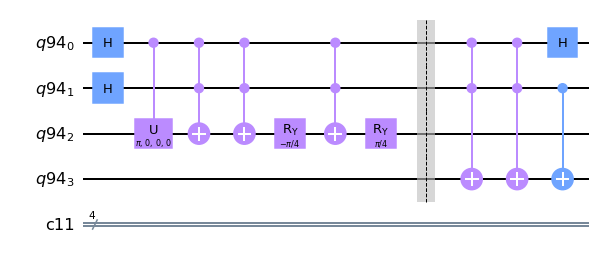

In [105]:
circuit.draw('mpl')